In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import glob
import os
import re
from scipy.signal import savgol_filter
from numpy.polynomial.polynomial import Polynomial
from scipy.fft import fft

In [2]:
def filtering1d(data):
    return savgol_filter(data,100,3)

In [3]:
def filtering(data,n_sample,poly_order):
    for i in range(data.shape[1]):
        for j in range(data.shape[2]):
            data[:,i,j] = savgol_filter(data[:,i,j],n_sample,poly_order)
    return data

In [4]:
def polynomial_fitting(data):
    x_small=np.arange(data.shape[0])
    for i in range(data.shape[1]):
        for j in range(data.shape[2]):
           approximation=Polynomial.fit(x_small,data[:,i,j],12) 
           data[:,i,j] = approximation(x_small)
    return data

In [5]:
def phasegram(data):
    for i in range(data.shape[1]):
        for j in range(data.shape[2]):
            data[:,i,j] = np.angle(fft(data[:,i,j]))
    return data

In [6]:
def phasegram_image(data):
    target_image=np.zeros((data.shape[1],data.shape[2]))
    for i in range(data.shape[1]):
        for j in range(data.shape[2]):
            target_image[i,j]=data[:,i,j].max()
    return target_image

In [7]:
# Path to the folder containing CSV files
#csv_folder = "/Users/jaworskj/Desktop/Infrared_thermography/Measurments/Measurment_0_nf/temperature_data" 
#csv_files = glob.glob(os.path.join(csv_folder, "*.csv"))

# Extract the numeric value from the filename using regex
#def extract_number(file_name):
#    match = re.search(r'\d+', os.path.basename(file_name))
#   return int(match.group()) if match else float('inf')  # Use 'inf' if no number is found

# Sort files by the numeric value in their names
#csv_files = sorted(csv_files, key=extract_number)

# Initialize an empty list to store 2D arrays
#frames = []

# Loop through CSV files and load them as 2D arrays
#for csv_file in csv_files:
#    data = np.loadtxt(csv_file, delimiter=",")  # Load CSV file as a NumPy array
#    frames.append(data)

# Stack all 2D arrays into a 3D array
#stacked_array = np.stack(frames, axis=0)

#print(f"3D Array shape: {stacked_array.shape}")

3D Array shape: (1500, 512, 640)


In [7]:
def ReadingDataToStack(csv_folder):
    csv_files = glob.glob(os.path.join(csv_folder, "*.csv"))

    # Extract the numeric value from the filename using regex
    def extract_number(file_name):
        match = re.search(r'\d+', os.path.basename(file_name))
        return int(match.group()) if match else float('inf')  # Use 'inf' if no number is found

    # Sort files by the numeric value in their names
    csv_files = sorted(csv_files, key=extract_number)

    # Initialize an empty list to store 2D arrays
    frames = []

    # Loop through CSV files and load them as 2D arrays
    for csv_file in csv_files:
        data = np.loadtxt(csv_file, delimiter=",")  # Load CSV file as a NumPy array
        frames.append(data)

    # Stack all 2D arrays into a 3D array
    stacked_array = np.stack(frames, axis=0)
    cropped_frames=stacked_array[:,:,64:640-64]#Squaring an image
    print(f"3D Array shape: {cropped_frames.shape}")
    return cropped_frames

In [8]:
csv_folder = "/Users/jaworskj/Desktop/Infrared_thermography/Measurments/Measurment_0_nf/temperature_data"
frames = ReadingDataToStack(csv_folder)

3D Array shape: (1500, 512, 512)


In [9]:
frames=frames[:,128:512-128,128:512-128]

In [10]:
frames.shape

(1500, 256, 256)

<h2>Whole data filtering

In [11]:
#Filtering of the whole data
#frames=filtering(frames,100,3)
#frames.shape

<h2>Polynomial fitting

In [22]:
#frames=polynomial_fitting(frames)

<h2>Thermogram

In [11]:
x=np.arange(frames.shape[2])
y=np.arange(frames.shape[1])
X,Y=np.meshgrid(x,y)

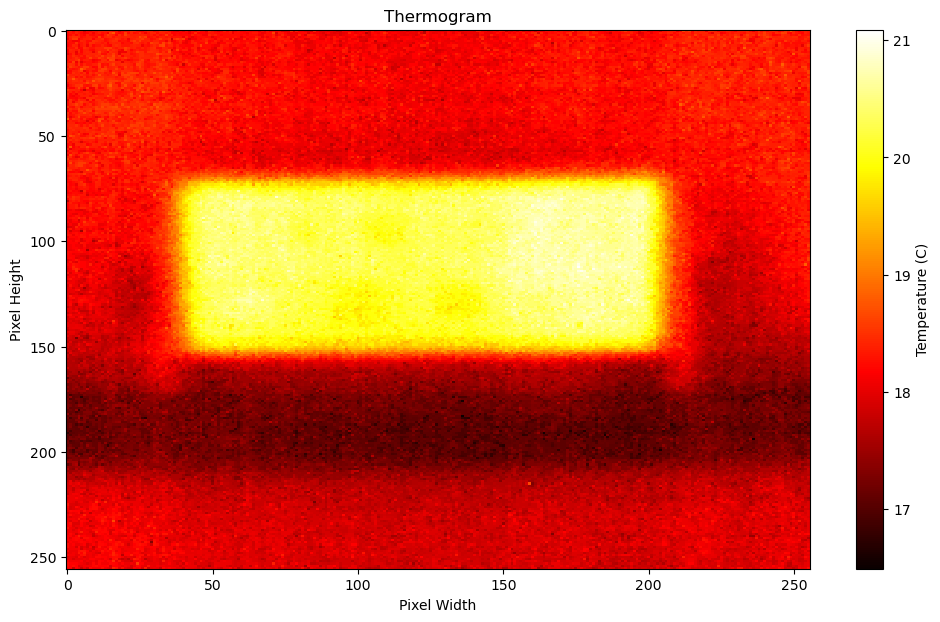

In [12]:
plt.figure(figsize=(12,7))
plt.pcolormesh(X,Y,frames[700],cmap='hot')
plt.colorbar(label='Temperature (C)')
plt.xlabel("Pixel Width")
plt.ylabel("Pixel Height")
plt.gca().invert_yaxis()
plt.title("Thermogram")
plt.show()

In [13]:
sound_material=frames[:,70,160]

In [14]:
defect_material=frames[:,90,115]

In [15]:
sound_material2=frames[:,70,30]

In [16]:
x_small=np.arange(frames.shape[0])

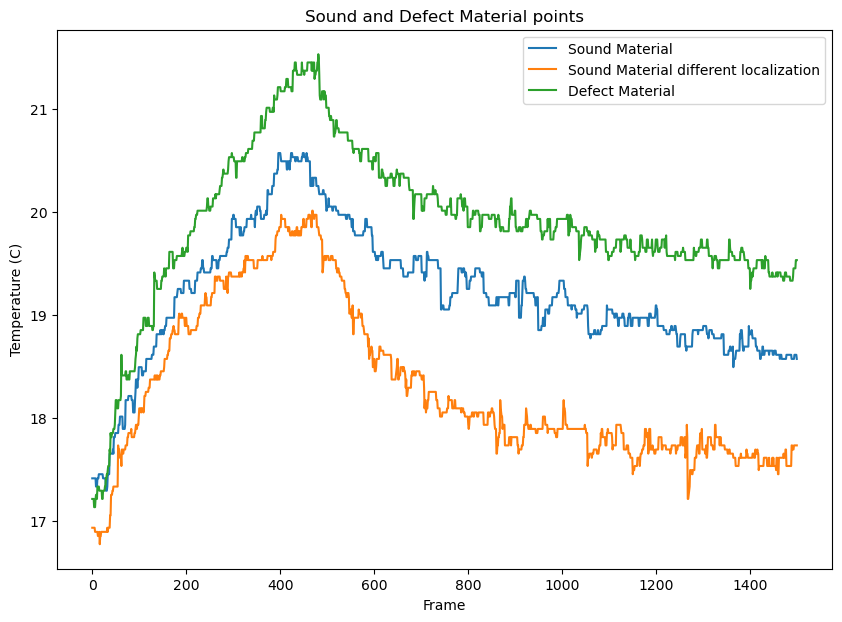

In [17]:
plt.figure(figsize=(10,7))
plt.plot(x_small,sound_material,label='Sound Material')
plt.plot(x_small,sound_material2,label='Sound Material different localization')
plt.plot(x_small,defect_material,label='Defect Material')
plt.legend()
plt.xlabel("Frame")
plt.ylabel("Temperature (C)")
plt.title("Sound and Defect Material points")
plt.show()

In [18]:
sound_material=filtering1d(sound_material)

In [19]:
sound_material2=filtering1d(sound_material2)

In [20]:
defect_material=filtering1d(defect_material)

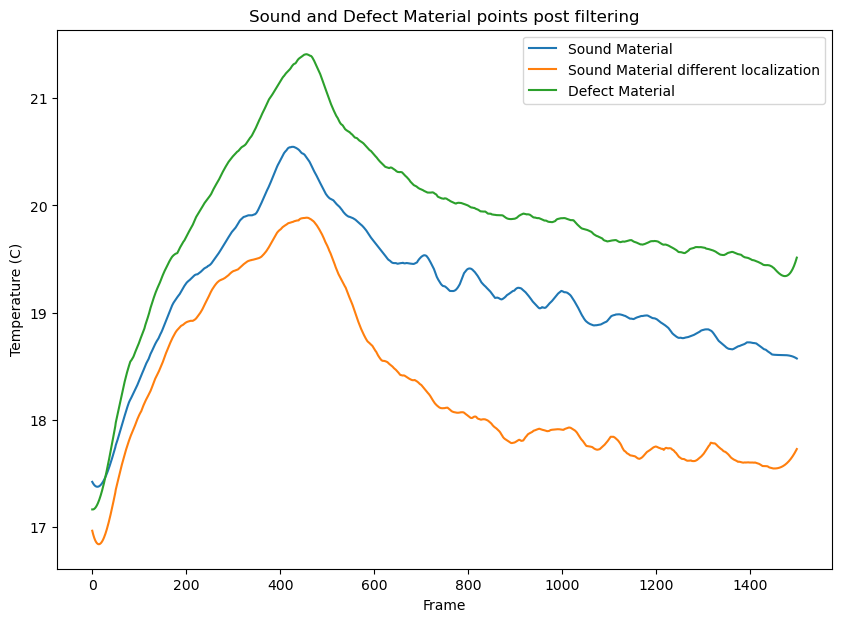

In [21]:
plt.figure(figsize=(10,7))
plt.plot(x_small,sound_material,label='Sound Material')
plt.plot(x_small,sound_material2,label='Sound Material different localization')
plt.plot(x_small,defect_material,label='Defect Material')
plt.legend()
plt.xlabel("Frame")
plt.ylabel("Temperature (C)")
plt.title("Sound and Defect Material points post filtering")
plt.show()

In [22]:
sound_material_fit=Polynomial.fit(x_small,sound_material,12)
defect_material_fit=Polynomial.fit(x_small,defect_material,12)

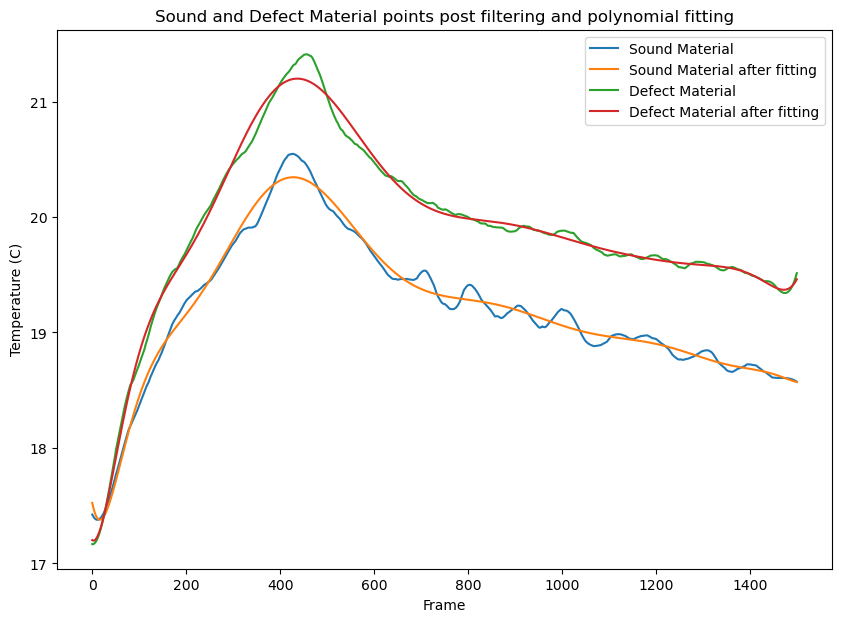

In [23]:
plt.figure(figsize=(10,7))
plt.plot(x_small,sound_material,label='Sound Material')
plt.plot(x_small,sound_material_fit(x_small),label='Sound Material after fitting')
plt.plot(x_small,defect_material,label='Defect Material')
plt.plot(x_small,defect_material_fit(x_small),label='Defect Material after fitting')
plt.legend()
plt.xlabel("Frame")
plt.ylabel("Temperature (C)")
plt.title("Sound and Defect Material points post filtering and polynomial fitting")
plt.show()

<h1>Phasegram

In [24]:
phase_data=phasegram(frames)

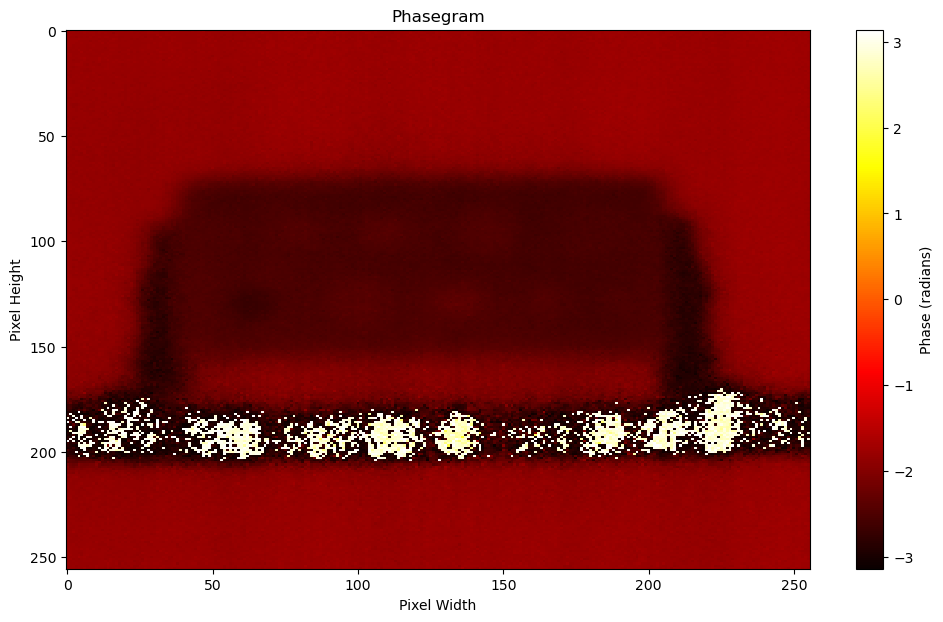

In [25]:
plt.figure(figsize=(12,7))
plt.pcolormesh(X,Y,phase_data[1],cmap='hot')
plt.colorbar(label='Phase (radians)')
plt.xlabel("Pixel Width")
plt.ylabel("Pixel Height")
plt.gca().invert_yaxis()
plt.title("Phasegram")
plt.show()

In [26]:
phase_image=phasegram_image(frames)

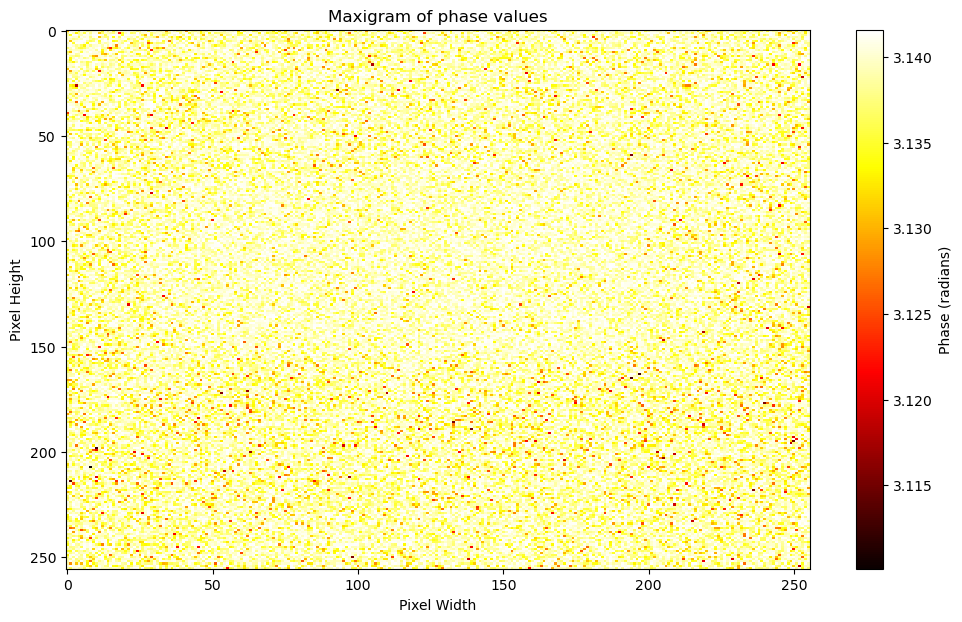

In [27]:
plt.figure(figsize=(12,7))
plt.pcolormesh(X,Y,phase_image,cmap='hot')
plt.colorbar(label='Phase (radians)')
plt.xlabel("Pixel Width")
plt.ylabel("Pixel Height")
plt.gca().invert_yaxis()
plt.title("Maxigram of phase values")
plt.show()